In [75]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [76]:
# Load data
def load_data(filename):
    f = open(filename, "r")

    global x, y
    x, y = [], []

    for line in f:
        l, radiance = line.split(",")
        x.append(l)
        y.append(radiance)

    x = np.array(x, dtype=np.float64)
    y = np.array(y, dtype=np.float64)
    noise = 0.2 * np.random.randn(len(y))  # add noise
    y_noisy = y + noise

    return x, y_noisy

In [77]:
# Blackbody radiation function with all parameters
def nlfunc(l, h, c, K, T):
    return (2 * h * c**2 / l**5) / (np.exp((h * c) / (l * K * T)) - 1)

In [78]:
def curve_fitting(x, y_noisy):
    # Constants for the blackbody spectrum
    global h_fixed, c_fixed, K_fixed, T_fixed
    h_fixed = 6.62607015e-34  # Planck's constant (J*s)
    c_fixed = 2.998e8  # Speed of light (m/s)
    K_fixed = 1.380649e-23  # Boltzmann constant (J/K)
    T_fixed = 6000.00  # Temperature(K)
    initial_guess = [
        h_fixed,
        c_fixed,
        K_fixed,
        T_fixed,
    ]  # Example initial guess for temperature

    # Fit data to the blackbody spectrum
    params, _ = curve_fit(nlfunc, x, y_noisy, p0=initial_guess)
    return params

 h_fit = 1.4247732394649525e-33
 c_fit = 201685712.87789991
 K_fit = 1.5395069738840864e-23
 T_fit = 5243.586589803959

 h_fit = 3.0578080053070537e-34
 c_fit = 354998807.0504989
 K_fit = 7.949603478076316e-24
 T_fit = 4090.2645712469734

 h_fit = 2.3791522669341284e-33
 c_fit = 154126310.24502125
 K_fit = 1.8861634456305762e-23
 T_fit = 5462.967731460856

 h_fit = 1.688078364379975e-33
 c_fit = 182686752.65530685
 K_fit = 2.109509897840237e-23
 T_fit = 4012.315331159715



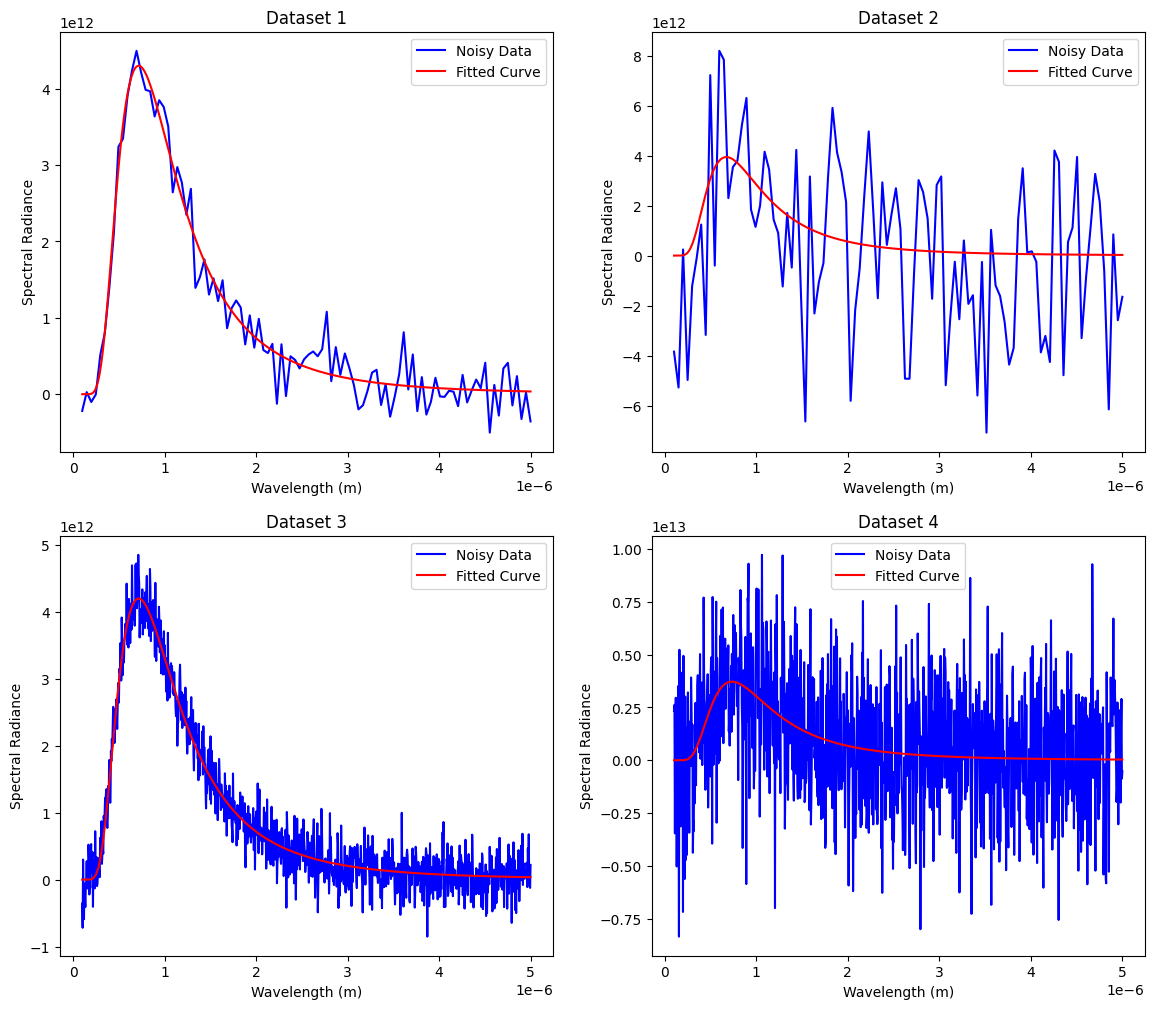

In [79]:
# Create a figure with a grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))  # 2x2 grid, adjust figsize as needed

# Dataset filenames and titles
filenames = ["d1.txt", "d2.txt", "d3.txt", "d4.txt"]
titles = ["Dataset 1", "Dataset 2", "Dataset 3", "Dataset 4"]

# Index for subplots
idx = 0

# Process each dataset and plot
for filename in filenames:
    x, y_noisy = load_data(filename)
    params = curve_fitting(x, y)
    h_fit = params[0]
    c_fit = params[1]
    K_fit = params[2]
    T_fit = params[3]

    print(f" h_fit = {h_fit}\n c_fit = {c_fit}\n K_fit = {K_fit}\n T_fit = {T_fit}\n")

    # Determine subplot position
    row = idx // 2
    col = idx % 2
    ax = axes[row, col]

    # Sort data for plotting
    sorted_indices = np.argsort(x)
    x_sorted = x[sorted_indices]
    y_noisy_sorted = y_noisy[sorted_indices]

    # Plot the noisy data and fitted curve
    ax.plot(x_sorted, y_noisy_sorted, label="Noisy Data", color="blue")
    x_fit = np.linspace(min(x), max(x), 1000)
    y_fit = nlfunc(x_fit, *params)
    ax.plot(x_fit, y_fit, color="red", label="Fitted Curve")

    # Set labels, legend, and title for the subplot
    ax.set_xlabel("Wavelength (m)")
    ax.set_ylabel("Spectral Radiance")
    ax.legend()
    ax.set_title(titles[idx])

    # Increment the index for the next subplot
    idx += 1

# Show the plot
plt.show()

In [80]:
# create partial function with only wavelength and T as parameters
def partialfunc_T(l, T):
    return (2 * h_fixed * c_fixed**2 / l**5) / (
        np.exp((h_fixed * c_fixed) / (l * K_fixed * T)) - 1
    )

In [85]:
# create partial function with only wavelength and h as parameters
def partialfunc_h(l, h):
    global t_fixed
    t_fixed = 4000.00  # from previous results
    return (2 * h * c_fixed**2 / l**5) / (
        np.exp((h * c_fixed) / (l * K_fixed * t_fixed)) - 1
    )

In [86]:
# create partial function with only wavelength and c as parameters
def partialfunc_c(l, c):
    return (2 * h_fixed * c**2 / l**5) / (
        np.exp((h_fixed * c) / (l * K_fixed * t_fixed)) - 1
    )

In [87]:
# create partial function with only wavelength and K as parameters
def partialfunc_K(l, K):
    return (2 * h_fixed * c_fixed**2 / l**5) / (
        np.exp((h_fixed * c_fixed) / (l * K * t_fixed)) - 1
    )

In [88]:
# calculate the parameters using curve fitting on the partial functions
for filename in filenames:
    x, y_noisy = load_data(filename)
    T_guess = 6000
    T, _ = curve_fit(partialfunc_T, x, y_noisy, p0=T_guess)
    print(f"T_fit = {T[0]}")
    h_guess = 6.63e-34
    h, _ = curve_fit(partialfunc_h, x, y_noisy, p0=h_guess)
    print(f"h_fit = {h[0]}")
    c_guess = 3e8
    c, _ = curve_fit(partialfunc_c, x, y_noisy, p0=c_guess)
    print(f"c_fit = {c[0]}")
    K_guess = 1.4e-23
    K, _ = curve_fit(partialfunc_K, x, y_noisy, p0=K_guess)
    print(f"K_fit = {K[0]}\n")

T_fit = 4019.8544785163613
h_fit = 6.584188695947929e-34
c_fit = 297251280.70030266
K_fit = 1.3875020170379547e-23

T_fit = 3956.750872092873
h_fit = 6.687959018225388e-34
c_fit = 300793593.84075284
K_fit = 1.365721192576067e-23

T_fit = 4000.5633732635047
h_fit = 6.622638868387446e-34
c_fit = 299379054.5274586
K_fit = 1.3808434671975695e-23

T_fit = 3904.6881561520354
h_fit = 6.8261842089740425e-34
c_fit = 311349683.09270024
K_fit = 1.347751567100121e-23

